In [36]:
!pip install scikit-fuzzy

In [54]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import differential_evolution, basinhopping, dual_annealing
sns.set_style("darkgrid")

In [38]:
# Define fuzzy variables
light_intensity = ctrl.Antecedent(np.arange(0, 101, 1), 'light_intensity')
motion_detected = ctrl.Antecedent(np.arange(0, 101, 1), 'motion_detected')
audio_level = ctrl.Antecedent(np.arange(0, 101, 1), 'audio_level')
network_traffic = ctrl.Antecedent(np.arange(0, 101, 1), 'network_traffic')

In [39]:
# Define fuzzy output variables
camera_activation = ctrl.Consequent(np.arange(0, 101, 1), 'camera_activation')
microphone_activation = ctrl.Consequent(np.arange(0, 101, 1), 'microphone_activation')
wireless_ap_control = ctrl.Consequent(np.arange(0, 101, 1), 'wireless_ap_control')


In [40]:
# Define membership functions
light_intensity['low'] = fuzz.trimf(light_intensity.universe, [0, 0, 50])
light_intensity['medium'] = fuzz.trimf(light_intensity.universe, [25, 50, 75])
light_intensity['high'] = fuzz.trimf(light_intensity.universe, [50, 100, 100])

motion_detected['low'] = fuzz.trimf(motion_detected.universe, [0, 0, 50])
motion_detected['high'] = fuzz.trimf(motion_detected.universe, [50, 100, 100])

audio_level['low'] = fuzz.trimf(audio_level.universe, [0, 0, 50])
audio_level['high'] = fuzz.trimf(audio_level.universe, [50, 100, 100])

network_traffic['low'] = fuzz.trimf(network_traffic.universe, [0, 0, 50])
network_traffic['high'] = fuzz.trimf(network_traffic.universe, [50, 100, 100])


In [41]:
# Output membership functions
camera_activation['off'] = fuzz.trimf(camera_activation.universe, [0, 0, 50])
camera_activation['on'] = fuzz.trimf(camera_activation.universe, [50, 100, 100])

microphone_activation['off'] = fuzz.trimf(microphone_activation.universe, [0, 0, 50])
microphone_activation['on'] = fuzz.trimf(microphone_activation.universe, [50, 100, 100])

wireless_ap_control['low'] = fuzz.trimf(wireless_ap_control.universe, [0, 0, 50])
wireless_ap_control['high'] = fuzz.trimf(wireless_ap_control.universe, [50, 100, 100])

In [42]:
# Define fuzzy rules
rule1 = ctrl.Rule(motion_detected['high'] | light_intensity['low'], camera_activation['on'])
rule2 = ctrl.Rule(audio_level['high'], microphone_activation['on'])
rule3 = ctrl.Rule(network_traffic['high'], wireless_ap_control['high'])
rule4 = ctrl.Rule(motion_detected['low'], camera_activation['off'])
rule5 = ctrl.Rule(audio_level['low'], microphone_activation['off'])
rule6 = ctrl.Rule(network_traffic['low'], wireless_ap_control['low'])

In [43]:
# Create control system
camera_ctrl = ctrl.ControlSystem([rule1, rule4])
microphone_ctrl = ctrl.ControlSystem([rule2, rule5])
wireless_ap_ctrl = ctrl.ControlSystem([rule3, rule6])

In [44]:
# Create simulation
camera_sim = ctrl.ControlSystemSimulation(camera_ctrl)
microphone_sim = ctrl.ControlSystemSimulation(microphone_ctrl)
wireless_ap_sim = ctrl.ControlSystemSimulation(wireless_ap_ctrl)

In [45]:
# Sample input values
camera_sim.input['motion_detected'] = 80
camera_sim.input['light_intensity'] = 30
microphone_sim.input['audio_level'] = 70
wireless_ap_sim.input['network_traffic'] = 90


In [46]:
# Compute the results
camera_sim.compute()
microphone_sim.compute()
wireless_ap_sim.compute()

In [47]:
# Display results
print("Camera Activation:", camera_sim.output['camera_activation'])
print("Microphone Activation:", microphone_sim.output['microphone_activation'])
print("Wireless AP Control:", wireless_ap_sim.output['wireless_ap_control'])

Camera Activation: 81.42857142857139
Microphone Activation: 79.58333333333327
Wireless AP Control: 82.77777777777777


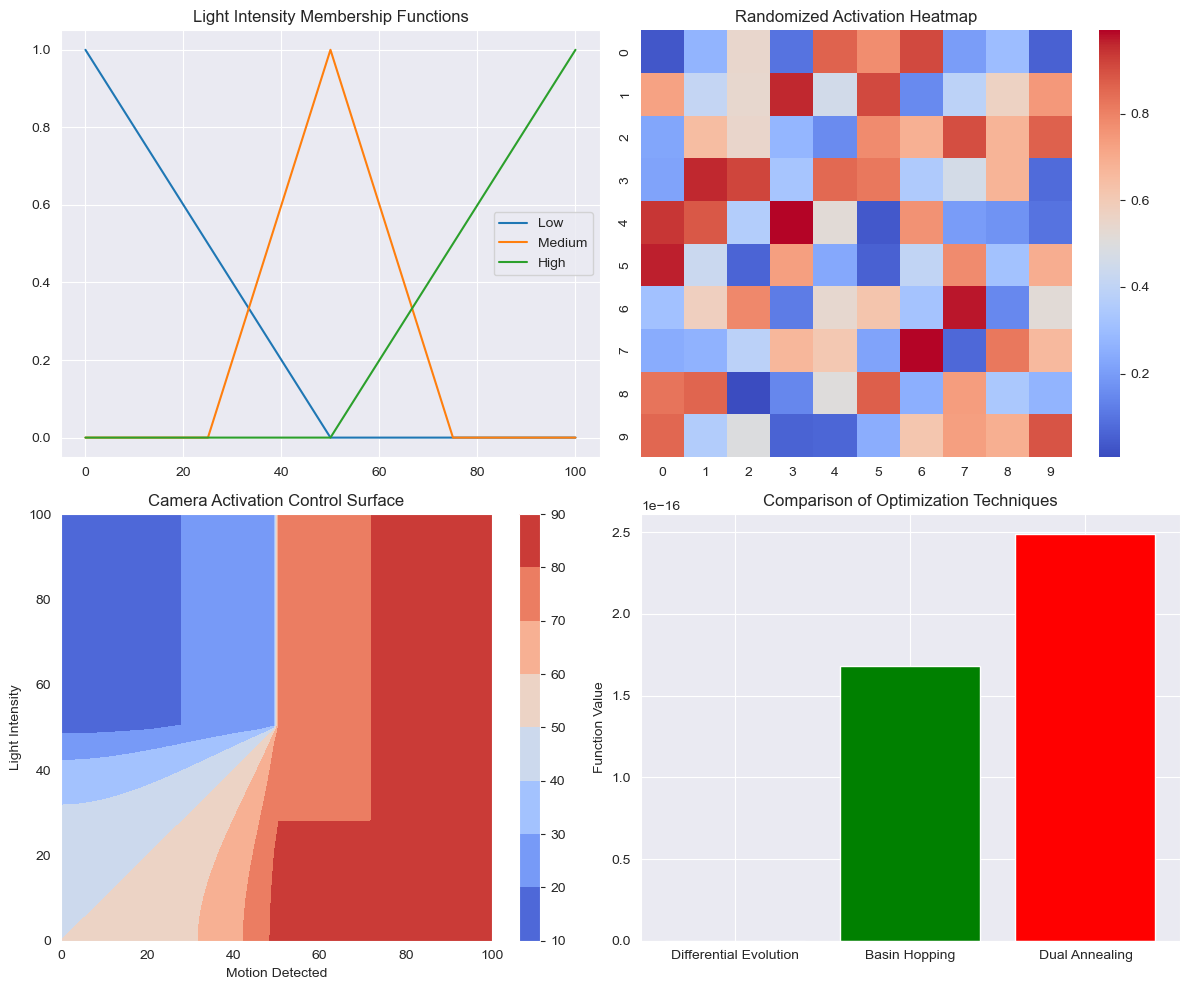

In [57]:
# Visualization of fuzzy membership functions
# Visualization of fuzzy membership functions
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Light Intensity Membership Functions
axs[0, 0].plot(light_intensity.universe, light_intensity['low'].mf, label='Low')
axs[0, 0].plot(light_intensity.universe, light_intensity['medium'].mf, label='Medium')
axs[0, 0].plot(light_intensity.universe, light_intensity['high'].mf, label='High')
axs[0, 0].set_title("Light Intensity Membership Functions")
axs[0, 0].legend()

# Randomized Heatmap
sns.heatmap(np.random.rand(10, 10), ax=axs[0, 1], cmap='coolwarm')
axs[0, 1].set_title("Randomized Activation Heatmap")

# Fuzzy control surface for Camera Activation
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        camera_sim.input['motion_detected'] = X[i, j]
        camera_sim.input['light_intensity'] = Y[i, j]
        camera_sim.compute()
        Z[i, j] = camera_sim.output['camera_activation']

# Contour Plot for Camera Activation
c = axs[1, 0].contourf(X, Y, Z, cmap='coolwarm')
fig.colorbar(c, ax=axs[1, 0])
axs[1, 0].set_title("Camera Activation Control Surface")
axs[1, 0].set_xlabel("Motion Detected")
axs[1, 0].set_ylabel("Light Intensity")

# Line plot for optimization results
methods = ['Differential Evolution', 'Basin Hopping', 'Dual Annealing']
results = [de_result.fun, bh_result.fun, da_result.fun]
axs[1, 1].bar(methods, results, color=['blue', 'green', 'red'])
axs[1, 1].set_title("Comparison of Optimization Techniques")
axs[1, 1].set_ylabel("Function Value")

plt.tight_layout()
plt.show()


In [48]:
# Part 2: Compare different optimization techniques on CEC’2005 functions
def cec_function(x):
    return sum([(xi ** 2) for xi in x])  # Example CEC function (Sphere Function)

bounds = [(-100, 100)] * 10  # 10-dimensional function

In [49]:
# Differential Evolution Optimization
de_result = differential_evolution(cec_function, bounds)
print("Differential Evolution Result:", de_result.fun)

Differential Evolution Result: 0.0


In [50]:
# Basin Hopping Optimization
bh_result = basinhopping(cec_function, np.random.rand(10) * 200 - 100)
print("Basin Hopping Result:", bh_result.fun)

Basin Hopping Result: 1.6812996463004323e-16


In [51]:
# Dual Annealing Optimization
da_result = dual_annealing(cec_function, bounds)
print("Dual Annealing Result:", da_result.fun)

Dual Annealing Result: 2.4860095184589617e-16


In [52]:
# Visualization of optimization performance
methods = ['Differential Evolution', 'Basin Hopping', 'Dual Annealing']
results = [de_result.fun, bh_result.fun, da_result.fun]

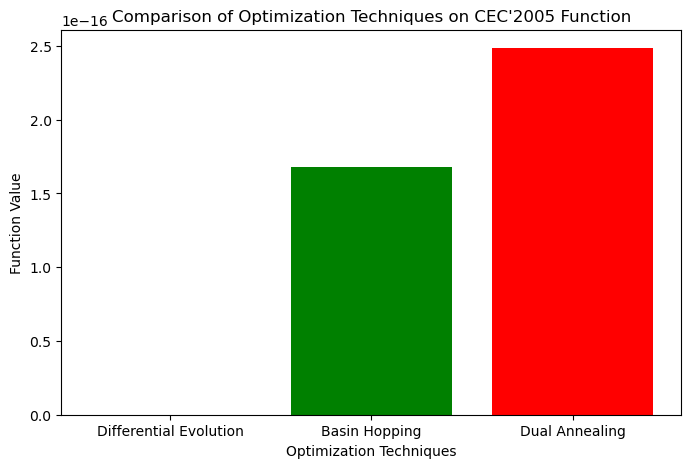

In [53]:
plt.figure(figsize=(8, 5))
plt.bar(methods, results, color=['blue', 'green', 'red'])
plt.xlabel("Optimization Techniques")
plt.ylabel("Function Value")
plt.title("Comparison of Optimization Techniques on CEC'2005 Function")
plt.show()
